<h1><center>WhatsApp Chat Analysis<center></h1>
<img src=https://upload.wikimedia.org/wikipedia/commons/6/6b/WhatsApp.svg alt="Drawing" style="width: 200px;"/>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries" data-toc-modified-id="Importing-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries</a></span></li><li><span><a href="#Loading-WhatsApp-Chat-Data" data-toc-modified-id="Loading-WhatsApp-Chat-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading WhatsApp Chat Data</a></span></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Exploration</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Basic-statistics" data-toc-modified-id="Basic-statistics-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Basic statistics</a></span></li><li><span><a href="#Date" data-toc-modified-id="Date-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Date</a></span></li><li><span><a href="#Time" data-toc-modified-id="Time-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Time</a></span></li><li><span><a href="#Author" data-toc-modified-id="Author-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Author</a></span></li><li><span><a href="#Message" data-toc-modified-id="Message-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Message</a></span><ul class="toc-item"><li><span><a href="#Overall" data-toc-modified-id="Overall-3.0.5.1"><span class="toc-item-num">3.0.5.1&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Author-wise" data-toc-modified-id="Author-wise-3.0.5.2"><span class="toc-item-num">3.0.5.2&nbsp;&nbsp;</span>Author-wise</a></span></li></ul></li><li><span><a href="#Emoji" data-toc-modified-id="Emoji-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Emoji</a></span><ul class="toc-item"><li><span><a href="#Overall" data-toc-modified-id="Overall-3.0.6.1"><span class="toc-item-num">3.0.6.1&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Author-wise" data-toc-modified-id="Author-wise-3.0.6.2"><span class="toc-item-num">3.0.6.2&nbsp;&nbsp;</span>Author-wise</a></span></li></ul></li><li><span><a href="#Subject" data-toc-modified-id="Subject-3.0.7"><span class="toc-item-num">3.0.7&nbsp;&nbsp;</span>Subject</a></span></li><li><span><a href="#Activeness" data-toc-modified-id="Activeness-3.0.8"><span class="toc-item-num">3.0.8&nbsp;&nbsp;</span>Activeness</a></span></li><li><span><a href="#Messages-Deleted" data-toc-modified-id="Messages-Deleted-3.0.9"><span class="toc-item-num">3.0.9&nbsp;&nbsp;</span>Messages Deleted</a></span></li><li><span><a href="#Interactions" data-toc-modified-id="Interactions-3.0.10"><span class="toc-item-num">3.0.10&nbsp;&nbsp;</span>Interactions</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-3.0.11"><span class="toc-item-num">3.0.11&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Basic-statistics" data-toc-modified-id="Basic-statistics-3.0.11.1"><span class="toc-item-num">3.0.11.1&nbsp;&nbsp;</span>Basic statistics</a></span></li><li><span><a href="#Overall" data-toc-modified-id="Overall-3.0.11.2"><span class="toc-item-num">3.0.11.2&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Author-wise" data-toc-modified-id="Author-wise-3.0.11.3"><span class="toc-item-num">3.0.11.3&nbsp;&nbsp;</span>Author-wise</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>References</a></span></li></ul></div>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import math
from collections import Counter
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 100)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import matplotlib.ticker as mtick
rcParams['figure.figsize'] = (8, 3)
rcParams['figure.dpi'] = 150
rcParams['lines.linewidth'] = 2

import seaborn as sns
sns.set_style("darkgrid")

import plotly.express as px
import plotly.graph_objects as go

from heatmap import heatmap, corrplot # pip install heatmapz

from wordcloud import WordCloud

import ipywidgets as widgets
from IPython.display import display

from PIL import Image

In [3]:
from helper import *
from text_preprocessing import *

2020-08-02 13:07:19,226 loading file /Users/harsh/.flair/models/sentiment-en-mix-distillbert.pt


## Loading WhatsApp Chat Data

- https://regexr.com/
- https://losslesshq.com/

In [4]:
chat_path = 'chat.txt'
chat_df = preparing_df(chat_path)

# a. Chat
df = chat_df[~chat_df["Author"].isnull()].reset_index(drop=True)
# b. Activities (Subject change, group icon change, left, added)
activity_df = chat_df[chat_df["Author"].isnull()]

In [5]:
df.head(5)

Date      Time             Author                         Message
0 2017-12-16  15:41:26        Sparsh Jain  Next sem trek par chalte hain😍
1 2017-12-16  15:41:48        Sparsh Jain                              🗻🏕
2 2017-12-16  15:42:05        Sparsh Jain                               🎿
3 2017-12-16  15:44:11            Nishant                              In
4 2017-12-16  19:28:36  Rahul Shrivastava                  HEC ke saath ?

## Data Exploration

#### Basic statistics

In [6]:
total_messages = df.shape[0]
number_of_days = (df["Date"].max() - df["Date"].min()).days + 1

print ("{:<32}: {}".format("Group formed", df["Date"].min().date()))
print ("{:<32}: {}".format("Total Authors", df["Author"].nunique()))
print ("{:<32}: {}".format("Total messages", total_messages))
print ("{:<32}: {}".format("Number of days", number_of_days))
print ("{:<32}: {}".format("Avg. messages sent every day", round(total_messages/number_of_days, 2)))

Group formed                    : 2017-12-16
Total Authors                   : 13
Total messages                  : 22807
Number of days                  : 943
Avg. messages sent every day    : 24.19


#### Date

In [7]:
date_df = df.copy()

# enriching
## 1. year
date_df["year"] = date_df["Date"].apply(lambda x: x.year)

## 2. month
date_df["month"] = date_df["Date"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
date_df['month'] = pd.Categorical(date_df['month'], months)

## 3. day_of_week
date_df["day_of_week"] = date_df["Date"].apply(lambda x: x.strftime('%a'))
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
date_df['day_of_week'] = pd.Categorical(date_df['day_of_week'], day_of_week)

In [8]:
date_df.head(2)

Date      Time       Author                         Message  year  \
0 2017-12-16  15:41:26  Sparsh Jain  Next sem trek par chalte hain😍  2017   
1 2017-12-16  15:41:48  Sparsh Jain                              🗻🏕  2017   

  month day_of_week  
0   Dec         Sat  
1   Dec         Sat

In [9]:
analysis_df = date_df.groupby(["year", "month"], as_index=False, sort=[True, True])["Message"].count()
analysis_df = analysis_df[~analysis_df["Message"].isnull()]
analysis_df["month_year"] = analysis_df.apply(lambda x: x["month"] + " " + str(x["year"]), axis=1)

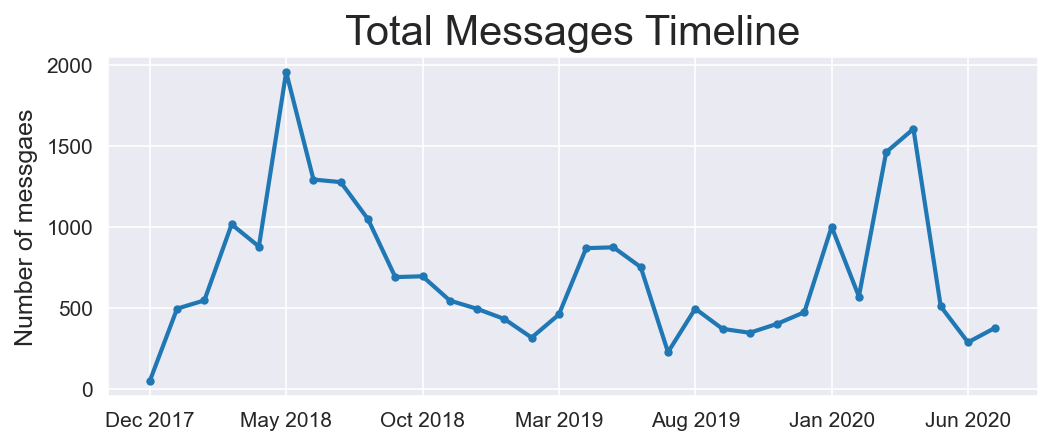

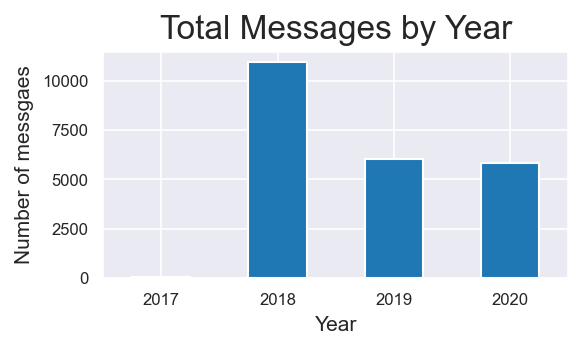

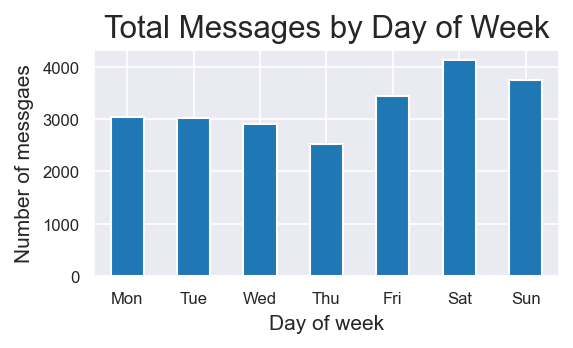

In [10]:
## plot 1
analysis_df.set_index("month_year")["Message"].plot(style='.-', figsize=(8, 3))
plot_chart(title="Total Messages Timeline", title_size=20, ylabel="Number of messgaes", ylabel_size=12)

## plot 2
analysis_df.groupby("year")["Message"].sum().plot(kind='bar', figsize=(4, 2))
plot_chart(title="Total Messages by Year", title_size=16, ylabel="Number of messgaes", ylabel_size=10, xlabel="Year", xlabel_size=10, xticks_size=8, yticks_size=8)

## plot 3
date_df.groupby('day_of_week', sort=[True])["Message"].count().plot(kind='bar', figsize=(4, 2))
plot_chart(title="Total Messages by Day of Week", title_size=15, ylabel="Number of messgaes", ylabel_size=10, xlabel="Day of week", xlabel_size=10, xticks_size=8, yticks_size=8)

#### Time

In [11]:
time_df = df.copy()

# enriching
## 1. hour
time_df["hour"] = time_df["Time"].apply(lambda x: x.hour)

## 2. day_of_week
time_df["day_of_week"] = time_df["Date"].apply(lambda x: x.strftime('%a'))
day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
time_df['day_of_week'] = pd.Categorical(time_df['day_of_week'], day_of_week)

## 3. part_of_day
time_df["part_of_day"] = time_df["hour"].apply(lambda x: part_of_day(x))

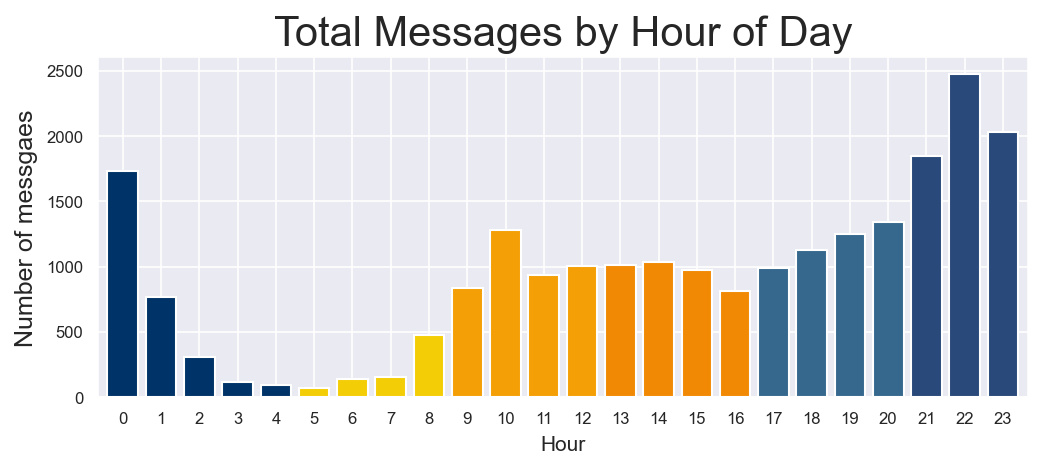

In [12]:
analysis_1_df = time_df.groupby(["hour", "part_of_day"], as_index=False)["Message"].count()
colors = {'Late Night': "#003367",
          'Early Morning':"#F3CD05",
          'Morning': "#F49F05",
          'Noon':"#F18904",
          'Eve': "#36688D",
          'Night':"#28497a"}
analysis_1_df.set_index("hour")["Message"].plot(kind="bar", color=[colors[i] for i in analysis_1_df['part_of_day']], width=0.8)
plot_chart(title="Total Messages by Hour of Day",title_size=20, ylabel="Number of messgaes", ylabel_size=12, xlabel="Hour", xlabel_size=10, xticks_size=8, yticks_size=8)

Text(0.5, 1.0, 'Number of messages')

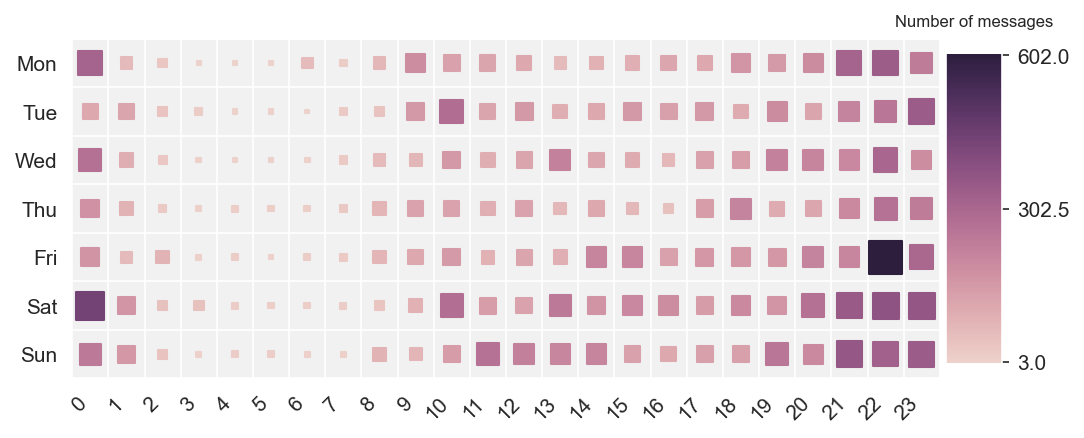

In [13]:
analysis_2_df = time_df.groupby(['hour', 'day_of_week'], as_index=False)["Message"].count()

plt.figure(figsize=(8, 3))
heatmap(
    x=analysis_2_df['hour'],
    y=analysis_2_df['day_of_week'],
    size_scale=250,
    size=analysis_2_df['Message'], 
    y_order=day_of_week[::-1],
    color=analysis_2_df['Message'], 
    palette=sns.cubehelix_palette(128)
)
plt.title("Number of messages", fontsize=8)

In [14]:
# analysis_2_df = time_df.pivot_table(index=["day_of_week"], columns=["hour"], values=["Message"], aggfunc='count')
# analysis_2_df.columns = [col_i[1] for col_i in analysis_2_df.columns]

# f, ax = plt.subplots(figsize=(18, 6))
# sns.heatmap(analysis_2_df, annot=True, fmt="d", linewidths=.5, ax=ax)
# plot_chart()

#### Author

In [15]:
author_df = df["Author"].value_counts().reset_index()
author_df.rename(columns={"index":"Author", "Author":"Number of messages"}, inplace=True)
author_df["Total %"] = round(author_df["Number of messages"]*100/df.shape[0], 2)
author_df["Talkativeness"] = author_df["Total %"].apply(lambda x: talkativeness(x, df["Author"].nunique()))

In [16]:
print ("Total Authors: {}".format(df["Author"].nunique()))

Total Authors: 13


In [17]:
fig = go.Figure()

labels = author_df["Author"].values
parents = []

fig.add_trace(go.Treemap(
    labels = labels,
    parents = [""]*len(labels),
    values =  author_df["Number of messages"].values,
    textinfo = "label+value+percent parent",
    textfont={'size':14},
    meta={"title.text":"Hi"}
))
fig.update_layout(title_text="Total Messages: "+ str(df.shape[0]), font_size=20, title_x=0.5)
fig.show()

In [18]:
t_author_df = df.copy()

# enriching
## 1. year
t_author_df["year"] = t_author_df["Date"].apply(lambda x: x.year)

## 2. month
t_author_df["month"] = t_author_df["Date"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
t_author_df['month'] = pd.Categorical(t_author_df['month'], months)

In [19]:
analysis_1_df = t_author_df.pivot_table(index=["month", "year"], columns=["Author"], values=["Message"], aggfunc="count", fill_value=0)
analysis_1_df.columns = [col_[1] for col_ in analysis_1_df.columns]
analysis_1_df = analysis_1_df.reset_index().sort_values(["year", "month"])
analysis_1_df["month_year"] = analysis_1_df.apply(lambda x: x["month"] + " " + str(x["year"]), axis=1)
analysis_1_df.drop(["month", "year"], axis=1, inplace=True)
analysis_1_df.set_index('month_year',inplace=True)

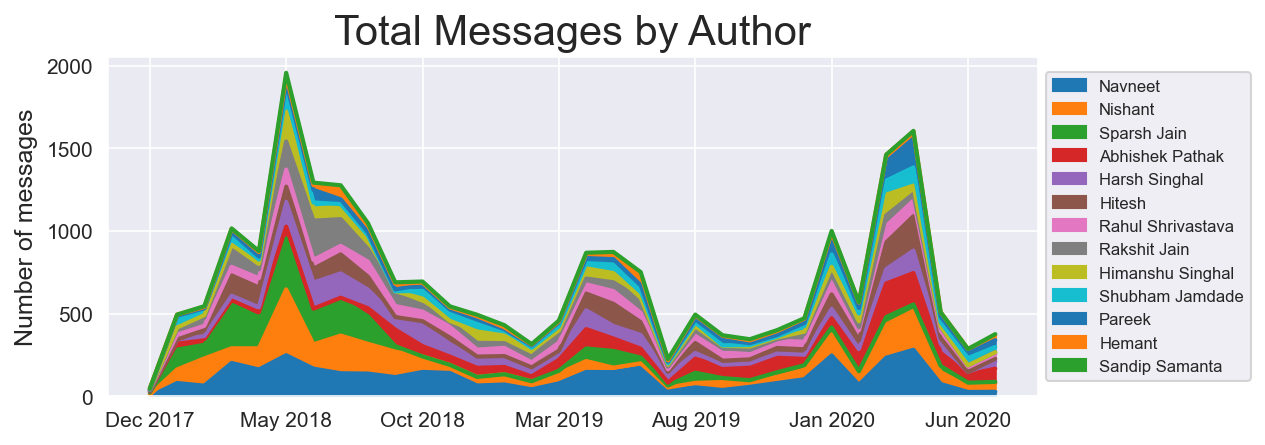

In [20]:
analysis_1_df[analysis_1_df.sum().sort_values(ascending=False).index].plot(kind='area')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)
plot_chart(title="Total Messages by Author", title_size=20, ylabel="Number of messages", ylabel_size=12)

In [21]:
def author_timeline(author):
    analysis_1_df[author].plot(style='.-')
    plot_chart(title=author + ": Total Messages Timeline", title_size=20, ylabel="Number of messages", ylabel_size=12)

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(author_timeline, {'author': dropdown})
display(ui, out)

Output()

In [22]:
author_df["Messaging trend"] = author_df["Author"].apply(lambda x: trendline(analysis_1_df[x]))

In [23]:
author_df

Author  Number of messages  Total %         Talkativeness  \
0             Navneet                3681    16.14        Very talkative   
1             Nishant                3064    13.43        Very talkative   
2         Sparsh Jain                2212     9.70        Very talkative   
3     Abhishek Pathak                2085     9.14  Moderately talkative   
4       Harsh Singhal                1953     8.56  Moderately talkative   
5              Hitesh                1852     8.12  Moderately talkative   
6   Rahul Shrivastava                1711     7.50  Moderately talkative   
7        Rakshit Jain                1696     7.44  Moderately talkative   
8    Himanshu Singhal                1219     5.34    Quiet, untalkative   
9     Shubham Jamdade                1192     5.23    Quiet, untalkative   
10             Pareek                1086     4.76    Quiet, untalkative   
11             Hemant                 841     3.69    Quiet, untalkative   
12     Sandip Samanta                 215     0.94    Quiet, untalkative   

       Messaging trend  
0   Decreasing (-0.47)  
1   Decreasing (-2.31)  
2   Decreasing (-4.88)  
3    Increasing (2.72)  
4   Decreasing (-0.69)  
5    Increasing (0.35)  
6    Increasing (0.28)  
7   Decreasing (-2.42)  
8   Decreasing (-0.75)  
9     Increasing (0.3)  
10   Increasing (1.54)  
11   Increasing (0.37)  
12  Decreasing (-0.17)

#### Message

In [24]:
message_df = df.copy()

## Removing: image omiited, document omitted, video omitted, contact card omiited
message_df = message_df[~message_df["Message"].str.contains('omitted')]
## Removing: "This message was deleted", "You deleted this message"
message_df = message_df[~(message_df["Message"].str.contains("This message was deleted.") | message_df["Message"].str.contains("You deleted this message."))]

message_df["processed_message"] = message_df["Message"].apply(lambda x: text_preprocessing(x))

##### Overall

In [25]:
words_lst = (''.join(message_df["processed_message"].values)).split(' ')
analysis_1_df = pd.DataFrame.from_dict(Counter(words_lst), orient='index', columns=["count"]).reset_index().rename(columns={'index': 'word'})
analysis_1_df.sort_values('count', ascending=False, inplace=True, ignore_index=True)
analysis_1_df[""] = analysis_1_df["count"].apply(lambda x: percent_helper(x/df.shape[0]))

display(analysis_1_df.head(8))

word  count                        
0        aa    233  <1 out of 100 messages
1      time    151  <1 out of 100 messages
2  birthday    134  <1 out of 100 messages
3      yaar    126  <1 out of 100 messages
4    sparsh    124  <1 out of 100 messages
5       day    113  <1 out of 100 messages
6     video    106  <1 out of 100 messages
7   navneet     97  <1 out of 100 messages

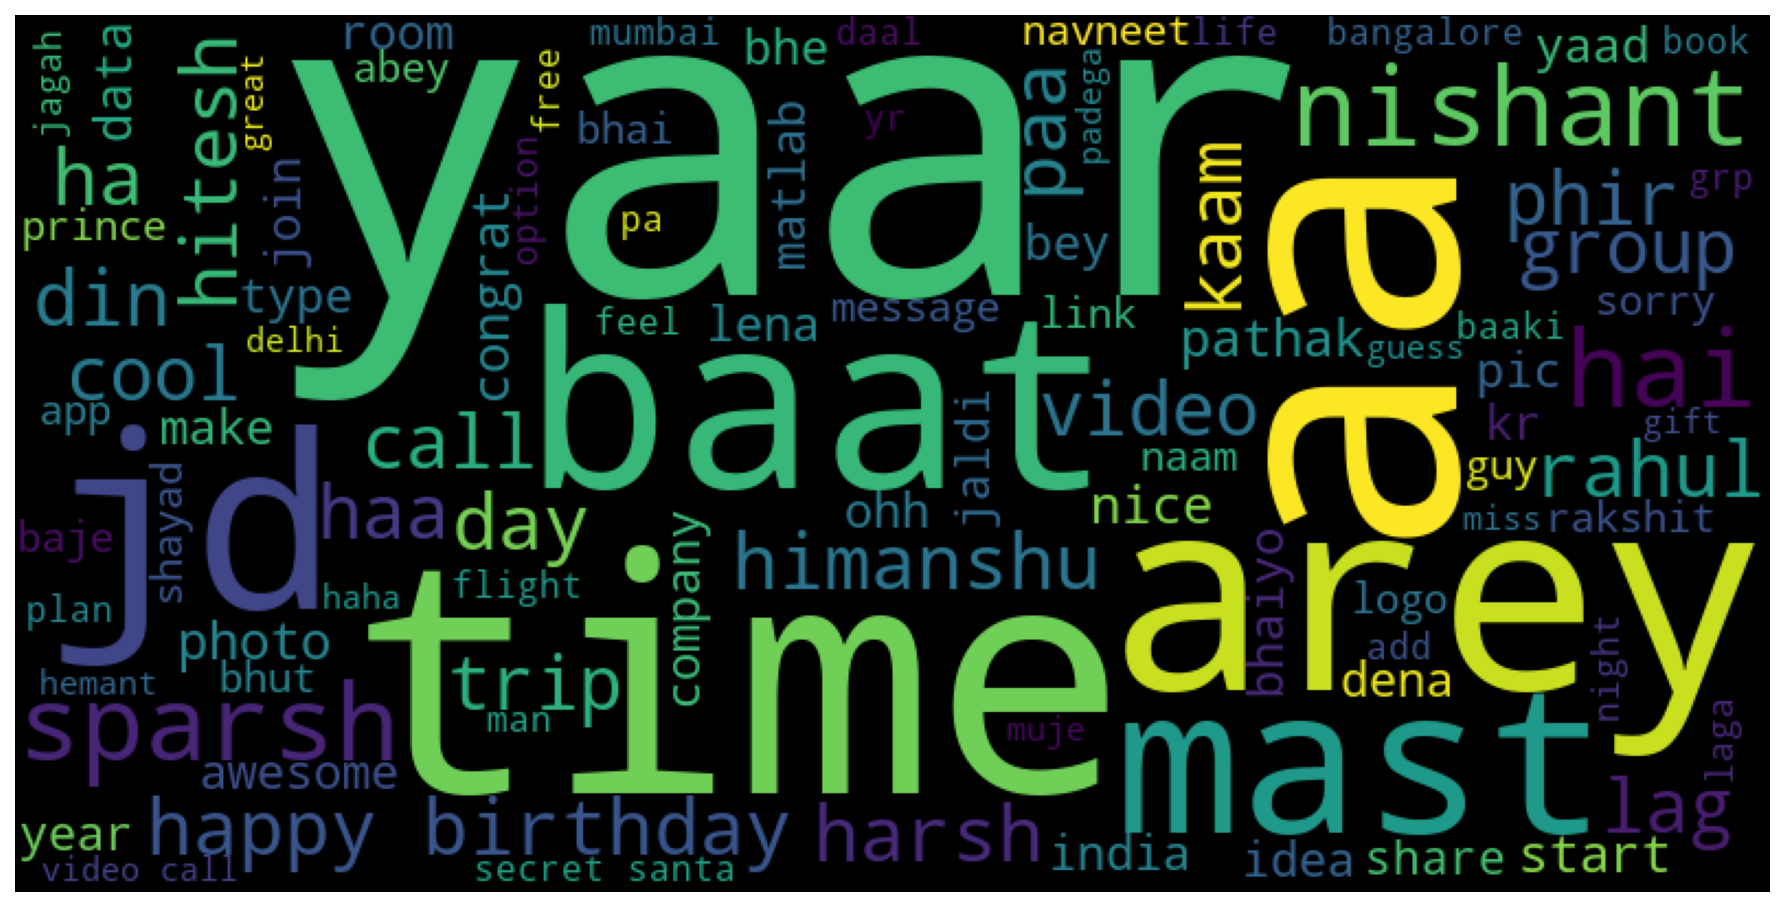

In [26]:
text = ' '.join(message_df["processed_message"].values)
wordcloud_(text)

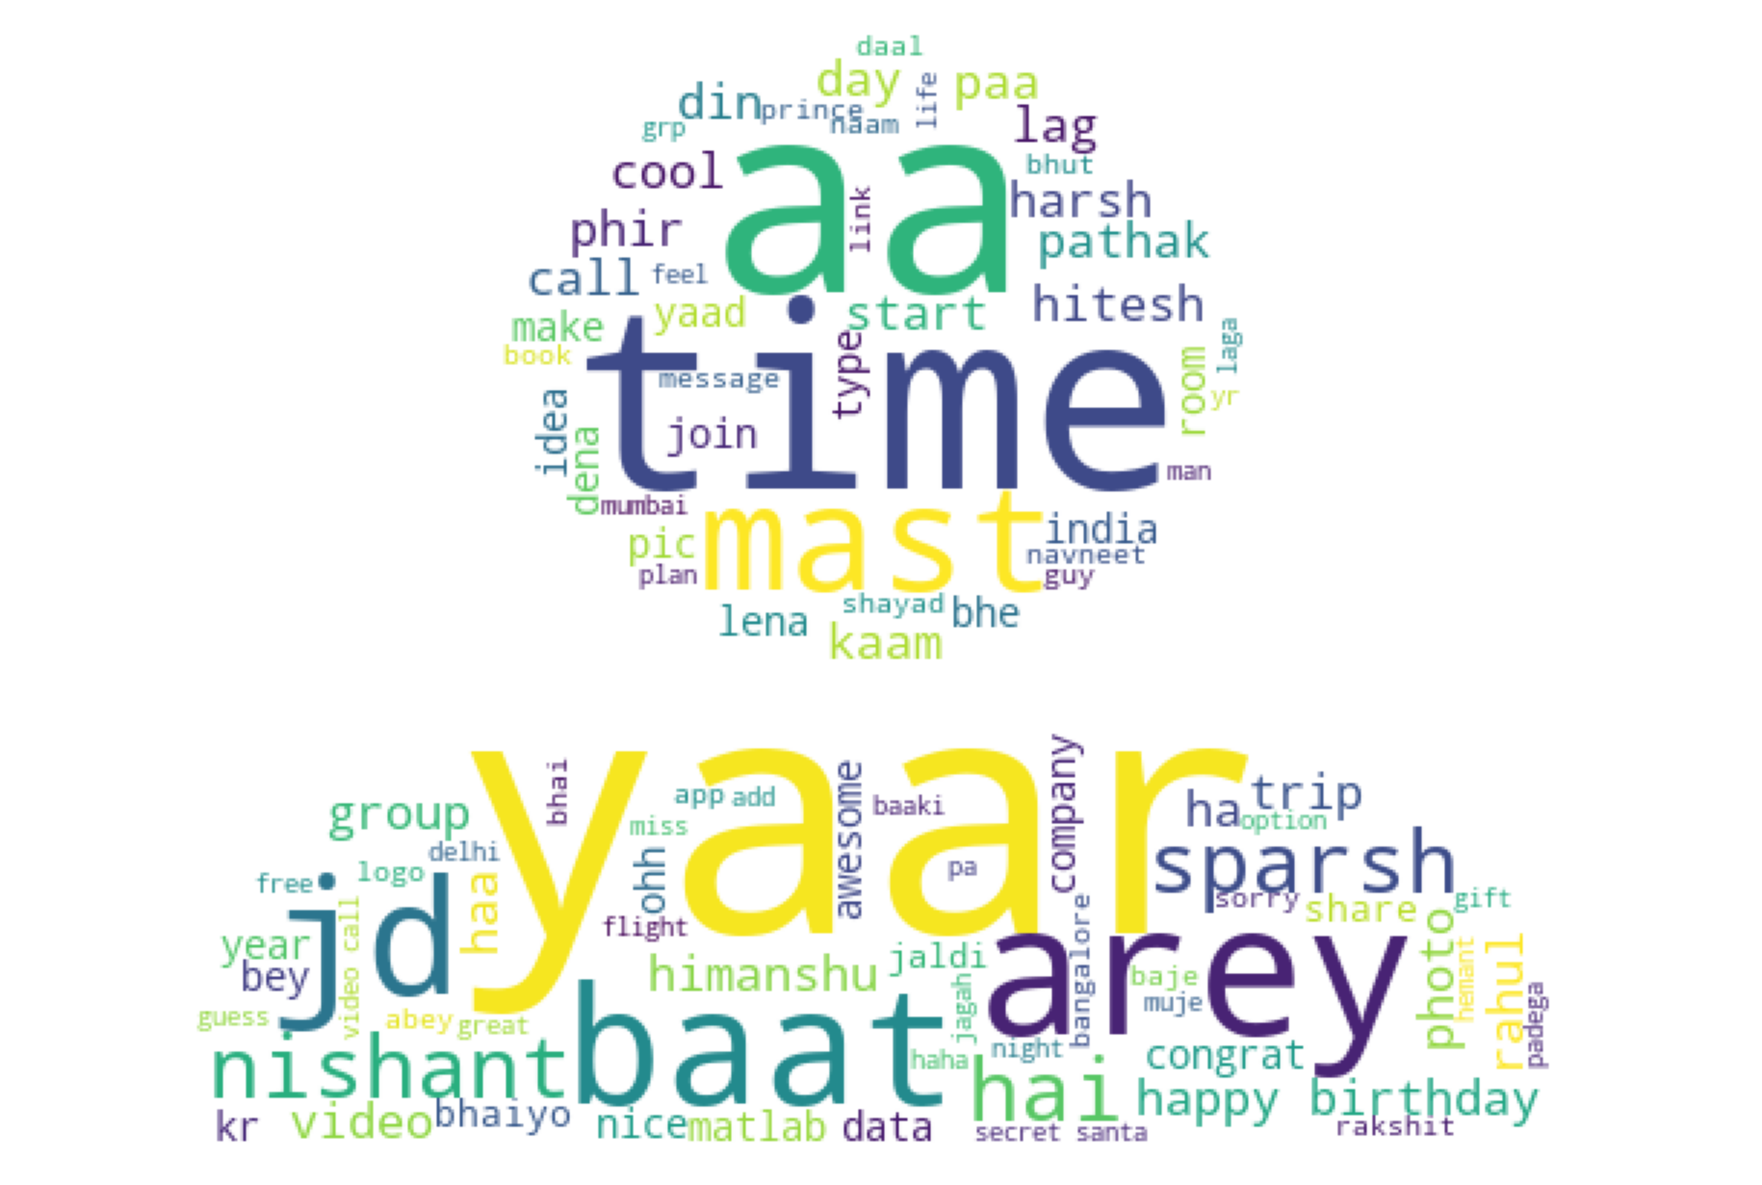

In [27]:
user_img = Image.open("user.png")
mask = np.array(user_img.resize((600, 400)))
wordcloud_(text, mask=mask, background_color='white')

##### Author-wise

In [28]:
analysis_2_df = message_df.groupby('Author', as_index=False).agg({'processed_message': ' '.join})

def top_words(text):
    words = text.split(' ')
    words = [word for word in words if word!='']
    words_dict = sorted(dict(Counter(words)).items(), key=lambda x: x[1], reverse=True)
    return [i[0] for i in words_dict[0:10]]
analysis_2_df["top_words"] = analysis_2_df["processed_message"].apply(lambda x: top_words(x))

In [29]:
analysis_2_df[["Author", "top_words"]]

Author  \
0     Abhishek Pathak   
1       Harsh Singhal   
2              Hemant   
3    Himanshu Singhal   
4              Hitesh   
5             Navneet   
6             Nishant   
7              Pareek   
8   Rahul Shrivastava   
9        Rakshit Jain   
10     Sandip Samanta   
11    Shubham Jamdade   
12        Sparsh Jain   

                                                                          top_words  
0                        [yaar, time, aa, haa, call, type, day, jd, happy, nishant]  
1                [bhe, haa, bhaiyo, yaar, sparsh, kai, phir, nishant, jd, himanshu]  
2             [happy, haha, bhaiyon, aa, raat, yaar, book, birthday, link, jamdade]  
3                           [pr, yaar, shi, arey, aa, pta, sparsh, bta, happy, gya]  
4                   [yaar, aa, jd, video, time, paas, navneet, lag, boom, himanshu]  
5                             [ha, kr, sparsh, bhut, muje, aa, yaar, time, yrr, yr]  
6                        [aa, yaar, bey, hai, himanshu, baat, abey, jd, mast, call]  
7                  [happy, aa, time, yr, tax, logo, congrats, birthday, make, cool]  
8             [yaar, arey, mast, happy, buhut, birthday, sparsh, aa, pathak, video]  
9                            [aa, arey, mast, cool, voh, phir, ohh, hai, abb, time]  
10  [happy, birthday, prince, sparsh, harsh, rahul, congrats, aa, gaurav, himanshu]  
11                    [arey, happy, yaar, guy, aa, ohh, ha, awesome, himanshu, voh]  
12                       [yaar, arey, hai, aa, pic, time, phir, hoon, happy, group]

In [30]:
user_img = Image.open("user.png")
mask = np.array(user_img.resize((600, 400)))

def author_wordcloud(author):
    text = ' '.join(message_df[message_df["Author"] == author]["processed_message"].values)
#     wordcloud_(text, title=author)
    wordcloud_(text, title=author, mask=mask, background_color='white')

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(author_wordcloud, {'author': dropdown})
display(ui, out)

Output()

In [31]:
analysis_3_df = message_df.copy()
analysis_3_df['length'] = analysis_3_df["Message"].apply(lambda x: len(x))
analysis_3_df = analysis_3_df.groupby('Author').apply(lambda x: round(np.mean(x), 2))
analysis_3_df.rename(columns={"length": "Mean Message Length"}, inplace=True)
analysis_3_df.sort_values('Mean Message Length', ascending=False).reset_index()

Author  Mean Message Length
0     Abhishek Pathak                49.74
1              Hitesh                40.61
2        Rakshit Jain                37.38
3              Hemant                36.53
4    Himanshu Singhal                35.81
5         Sparsh Jain                33.41
6      Sandip Samanta                29.15
7             Nishant                28.17
8     Shubham Jamdade                27.46
9              Pareek                26.02
10      Harsh Singhal                25.32
11            Navneet                23.28
12  Rahul Shrivastava                21.62

#### Emoji

In [32]:
emoji_df = df.copy()
emoji_df["emoji"] = emoji_df["Message"].apply(lambda x: extract_emojis(x))

In [33]:
total_emojis = ''.join(emoji_df["emoji"].values)

print ("{:<20}: {}".format("Total emojis used", len(total_emojis)))
print ("{:<20}: {} ({})".format("Emojis/Messages", round(len(total_emojis)/df.shape[0], 2), percent_helper(len(total_emojis)/df.shape[0])))

Total emojis used   : 18135
Emojis/Messages     : 0.8 (79 out of 100 messages)


##### Overall

In [34]:
analysis_1_df = pd.DataFrame.from_dict(Counter(total_emojis), orient='index', columns=["count"]).reset_index().rename(columns={'index': 'emoji'})
analysis_1_df.sort_values('count', ascending=False, inplace=True, ignore_index=True)
analysis_1_df[""] = analysis_1_df["count"].apply(lambda x: percent_helper(x/df.shape[0]))


display(analysis_1_df.head(5))

fig = px.pie(analysis_1_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text="Top Emojis", font_size=20, title_x=0.5)

fig.show()

emoji  count                       
0     😂   3784   4 out of 25 messages
1     🤣   2845   3 out of 25 messages
2     😅   1342   1 out of 20 messages
3     🏻    862  3 out of 100 messages
4     😄    491   1 out of 50 messages

##### Author-wise

In [35]:
analysis_2_df = emoji_df.groupby('Author', as_index=False).agg({'emoji': ''.join, "Message": 'count'})
analysis_2_df.rename(columns={"Message":"Total Messages"}, inplace=True)
analysis_2_df["Total Emojis"] = analysis_2_df["emoji"].apply(lambda x: len(x))
analysis_2_df["Emojis/Messages"] = round(analysis_2_df["Total Emojis"]/analysis_2_df["Total Messages"], 2)
analysis_2_df[""] = analysis_2_df.apply(lambda x: percent_helper(x['Total Emojis']/x['Total Messages']), axis=1)

def top_emojis(emojis):
    emoji_dict = sorted(dict(Counter(emojis)).items(), key=lambda x: x[1], reverse=True)
    return [i[0] for i in emoji_dict[0:10]]
analysis_2_df["Top Emojis"] = analysis_2_df["emoji"].apply(lambda x: top_emojis(x))

In [36]:
analysis_2_df.drop("emoji", axis=1).sort_values("Emojis/Messages", ascending=False).reset_index(drop=True)

Author  Total Messages  Total Emojis  Emojis/Messages  \
0      Sandip Samanta             215           316             1.47   
1   Rahul Shrivastava            1711          2157             1.26   
2         Sparsh Jain            2212          2412             1.09   
3              Hemant             841           876             1.04   
4     Shubham Jamdade            1192          1193             1.00   
5             Nishant            3064          2537             0.83   
6              Pareek            1086           882             0.81   
7        Rakshit Jain            1696          1314             0.77   
8    Himanshu Singhal            1219           870             0.71   
9     Abhishek Pathak            2085          1411             0.68   
10      Harsh Singhal            1953          1186             0.61   
11            Navneet            3681          2101             0.57   
12             Hitesh            1852           880             0.48   

                                                 Top Emojis  
0     73 out of 50 messages  [😃, 😊, 😂, 👌, 👍, 🎂, 😄, 🙏, 😍, 😅]  
1     63 out of 50 messages  [😄, 🤣, 😂, 😅, 🏻, 😍, 👍, 😮, 🙏, 👌]  
2   109 out of 100 messages  [🤣, 🏻, 😂, 😅, 😍, 😒, 😃, 🙏, ❤, 👌]  
3     26 out of 25 messages  [🤣, 🥳, 🏻, 😅, 👌, 😂, 🏼, 😇, 🤩, 😁]  
4       1 out of 1 messages  [😅, 😂, 👍, 🙏, 👌, 😊, 🤣, 😃, 😄, ♂]  
5     41 out of 50 messages  [🤣, 😂, 😛, 🤪, 🕜, 😅, 😜, 🕡, 🕤, 🇦]  
6    81 out of 100 messages  [😅, 😂, 😝, 🤣, 🙈, 😬, 😍, 😑, 🥳, ✌]  
7    77 out of 100 messages  [😂, 🤣, 😅, 😍, 🙄, 🤘, 😁, 🧐, ✌, 😱]  
8    71 out of 100 messages  [😂, 😛, 🏻, 😅, 🤣, 😉, 😜, 🤪, 👏, 😒]  
9    67 out of 100 messages  [😂, 😜, 😊, 😋, 🤩, ❤, 😍, 🙏, 😅, 🙌]  
10      3 out of 5 messages  [😂, 😀, 😅, 👌, 🏼, 🏻, 😛, 👍, 😜, 😍]  
11   56 out of 100 messages  [😂, 🤣, 😍, 🏻, 😅, 😛, ❣, 😜, 😐, 😝]  
12   47 out of 100 messages  [😂, 🏻, 🤣, 😅, 😏, 😜, 🤩, ♂, 😱, 😆]

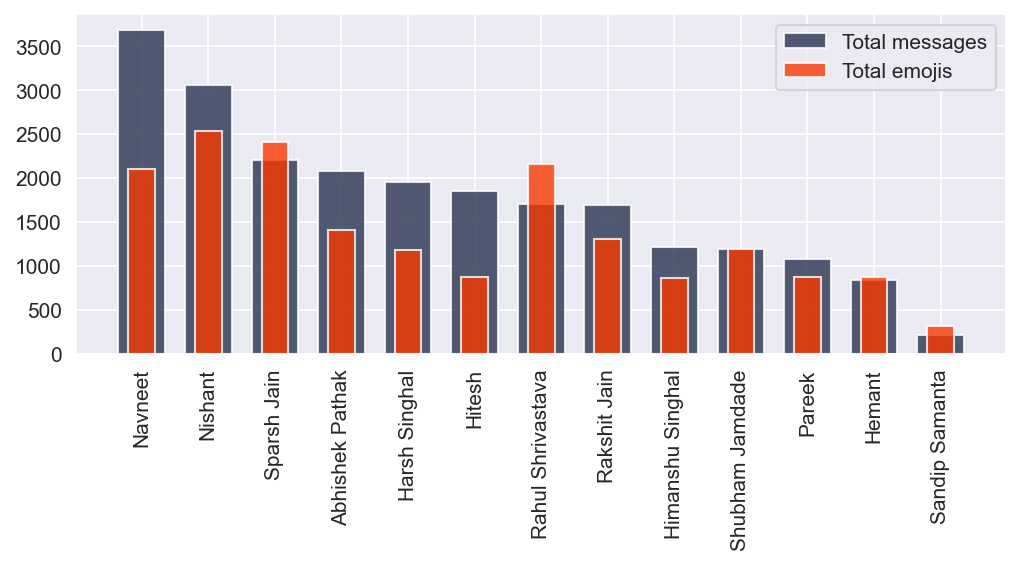

In [38]:
analysis_2_df.sort_values('Total Messages', ascending=False, inplace=True)
plt.bar(analysis_2_df["Author"], analysis_2_df["Total Messages"], color="#283350", label='Total messages', width=.7, alpha=0.8)
plt.bar(analysis_2_df["Author"], analysis_2_df["Total Emojis"], color="#f93800", label='Total emojis', width=.4, alpha=.8)
plot_chart(xticks_size=10, xticks_rotation=90, yticks_size=10, legend=True, legend_size=10)

In [39]:
def author_top_emojis(author):
    emojis_lst = ''.join(emoji_df[emoji_df["Author"] == author]["emoji"].values)
    emoji_counts_df = pd.DataFrame.from_dict(Counter(emojis_lst), orient='index', columns=["count"]).reset_index().rename(columns={'index': 'emoji'})    
    fig = px.pie(emoji_counts_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.update_layout(title_text=author + ": Top Emojis", font_size=20, title_x=0.5)
    fig.show()

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(author_top_emojis, {'author': dropdown})
display(ui, out)

Output()

#### Subject

In [40]:
subject_df = activity_df.copy()
subject_df = subject_df[["changed the subject to" in message for message in subject_df["Message"]]]
subject_df["subject"] = subject_df["Message"].apply(lambda x: ''.join(x.split('“')[1:])[:-1])
subject_df["processed_subject"] = subject_df["subject"].apply(lambda x: text_preprocessing(x))

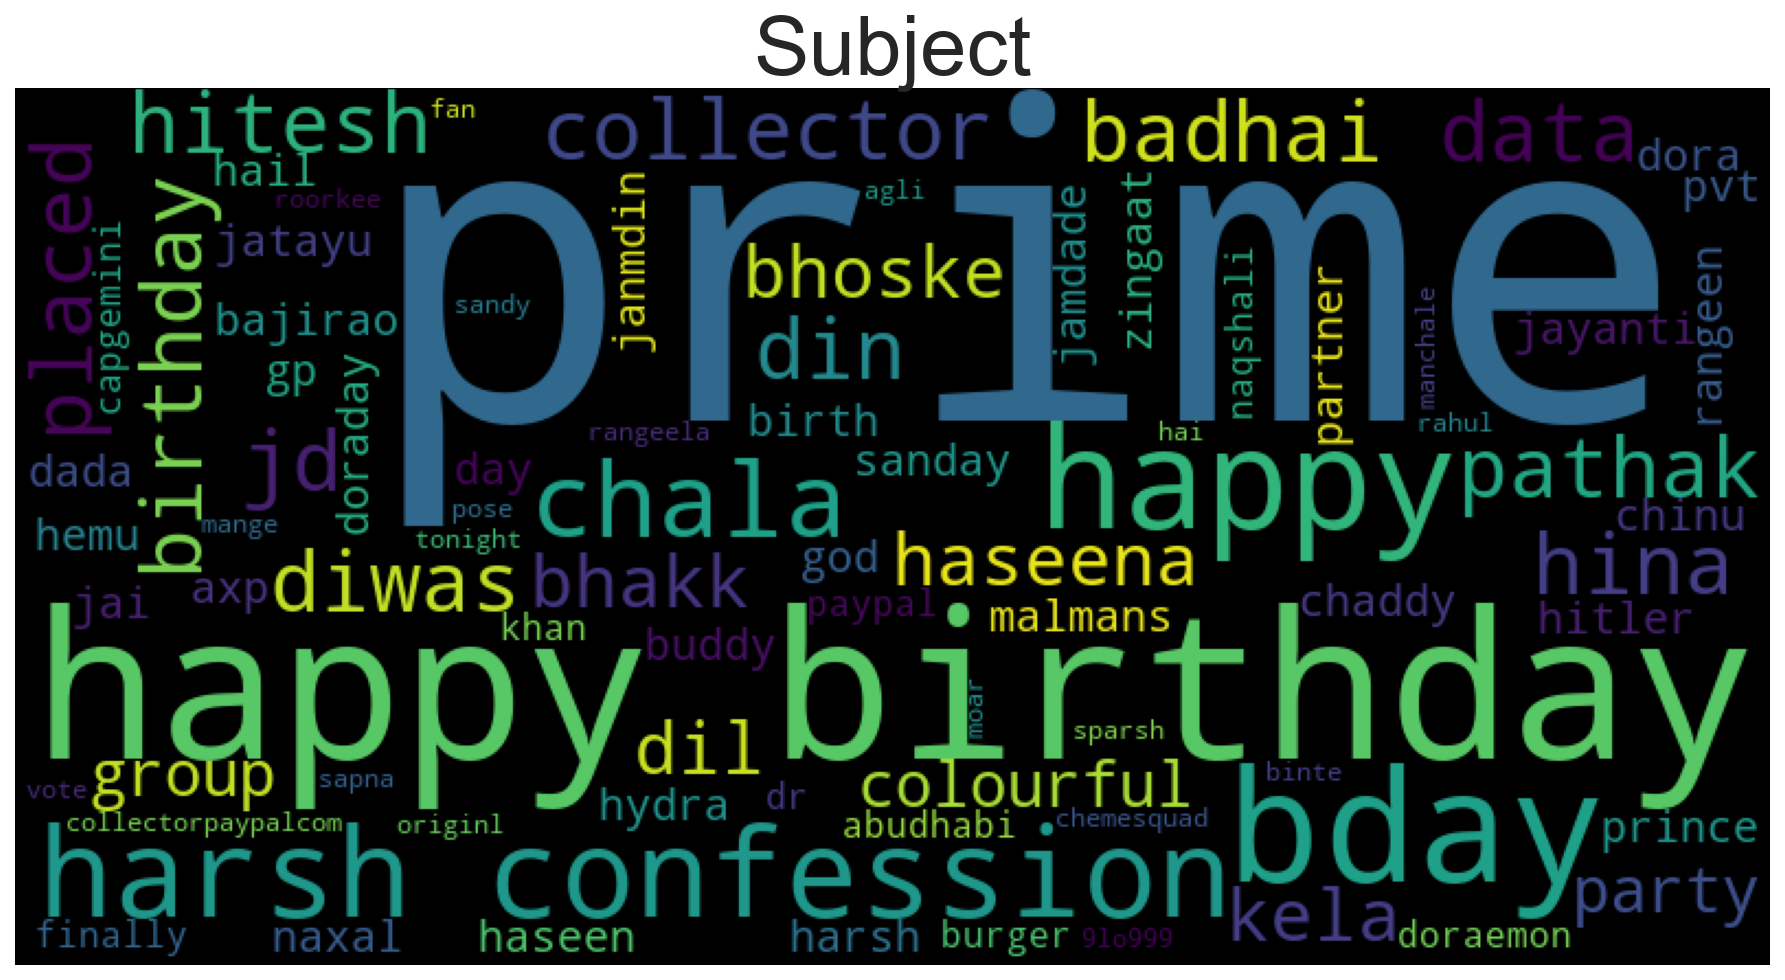

In [41]:
subject_text = ' '.join(subject_df.sort_values("Date", ascending=False)["processed_subject"].values)
wordcloud_(subject_text, title="Subject")

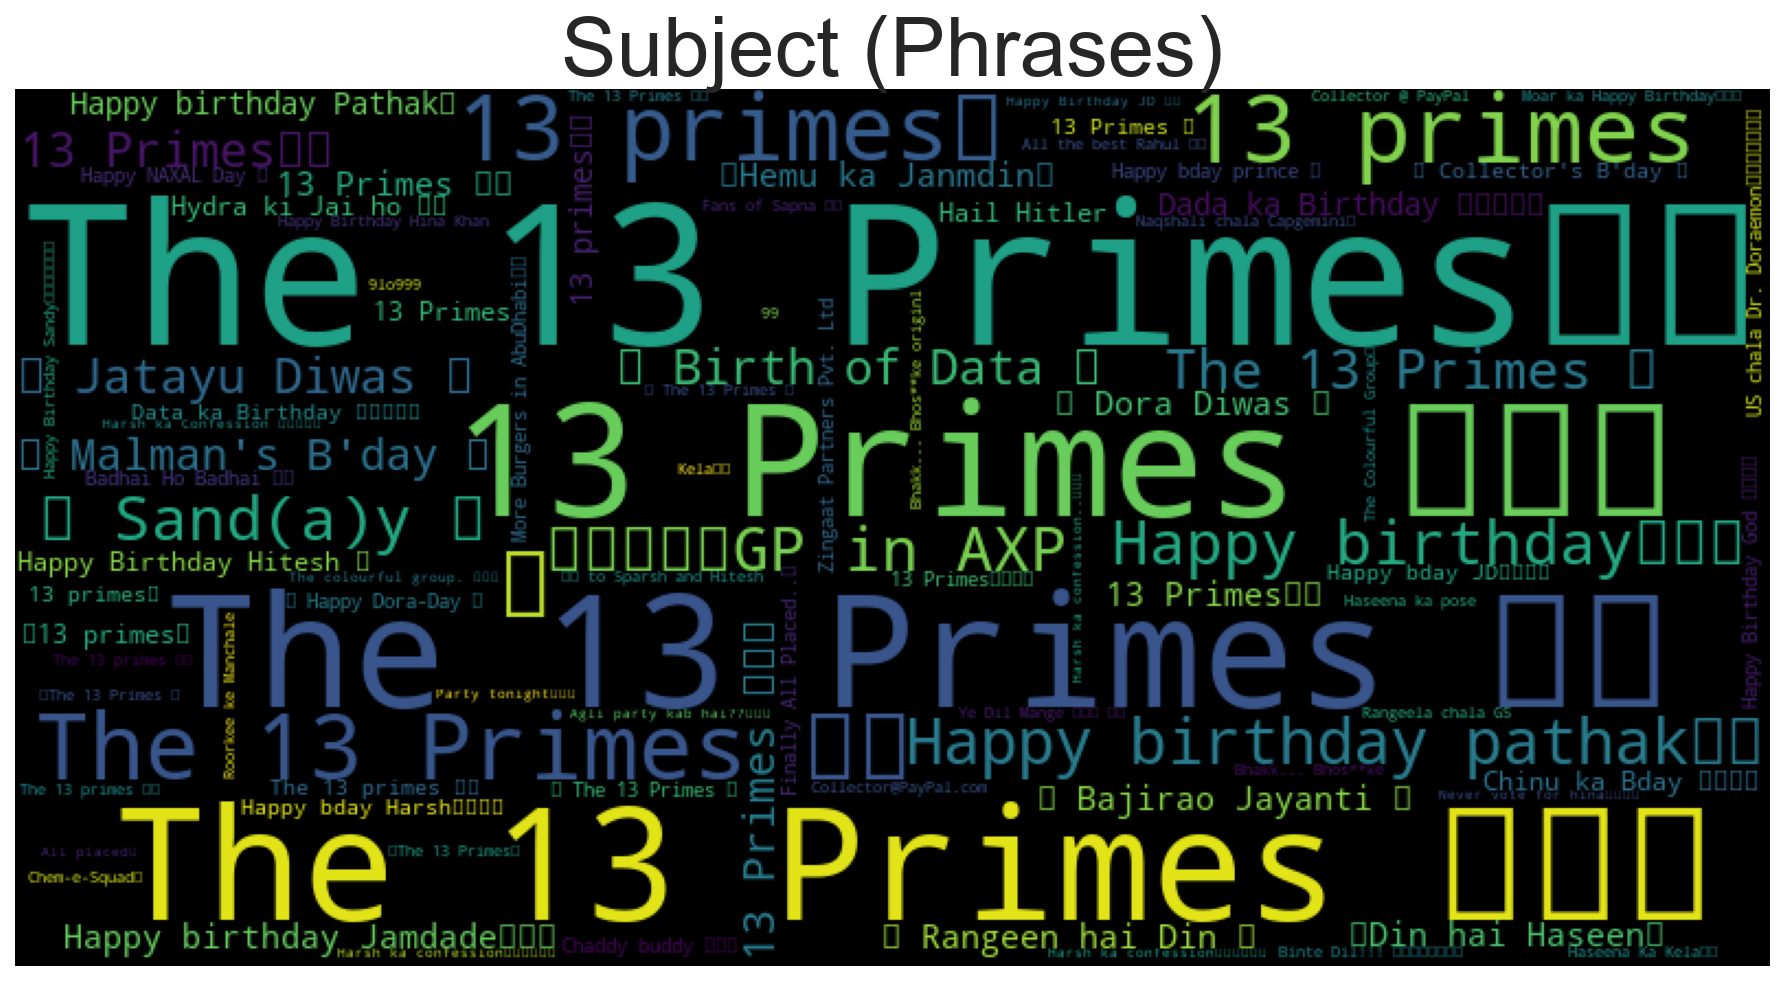

In [42]:
analysis_1_df = subject_df.groupby("subject").agg({"Date":['max', 'count']})
analysis_1_df.columns = ['_'.join(i) for i in analysis_1_df.columns]
analysis_1_df.rename(columns={"Date_count":'count'}, inplace=True)
analysis_1_df = analysis_1_df.sort_values(["count", "Date_max"], ascending=[False, False])

wordcloud_(analysis_1_df["count"].to_dict(), generate_from_frequencies=True, title="Subject (Phrases)")

#### Activeness

In [43]:
activeness_df = df.copy()
activeness_df = activeness_df.pivot_table(index='Date', columns='Author', values='Message', aggfunc={'Message': lambda x: 1}, fill_value=0)
activeness_df = activeness_df.rename_axis(None, axis=1)
## enriching missing dates
activeness_df = activeness_df.asfreq('D', fill_value=0)

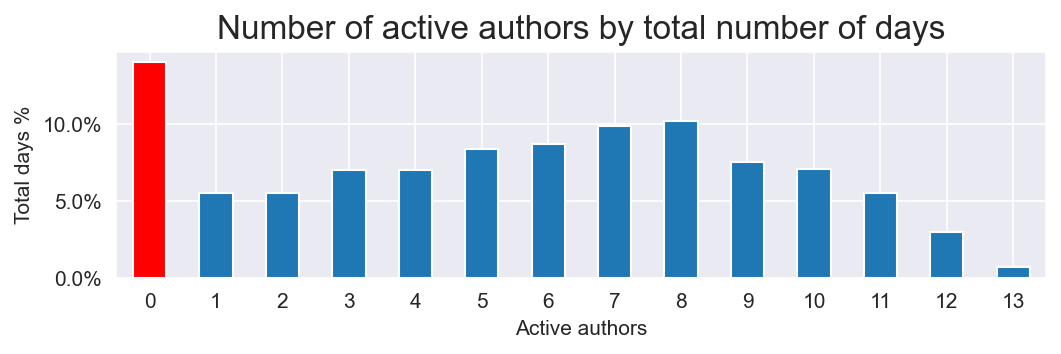

In [44]:
analysis_1_df = activeness_df.copy()
analysis_1_df["active_members"] = analysis_1_df.sum(axis=1)
analysis_1_df = pd.DataFrame(analysis_1_df["active_members"].value_counts().sort_index())
analysis_1_df.rename(columns={"active_members":"number_of_days"}, inplace=True)
analysis_1_df['number_of_days'] = round(100*analysis_1_df['number_of_days']/number_of_days, 2)

ax = analysis_1_df.plot(kind='bar', legend=False, figsize=(8, 2), color=[["r"] + ["#1f77b4"]*13])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plot_chart(title="Number of active authors by total number of days", title_size=16, ylabel="Total days %", xlabel="Active authors")

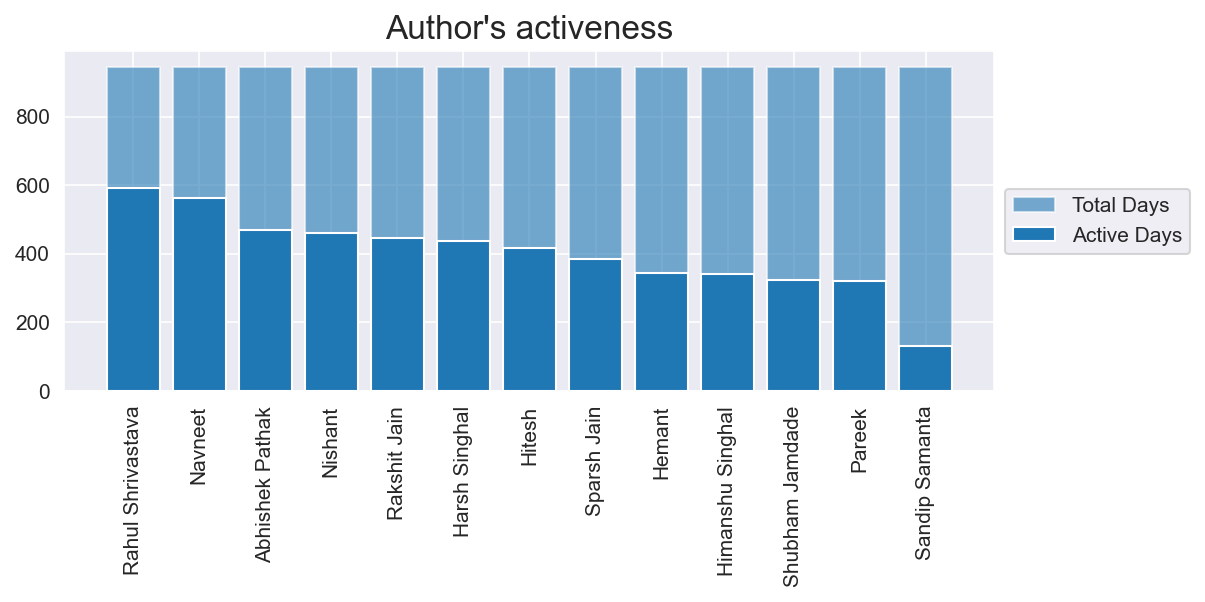

In [45]:
analysis_2_df = pd.DataFrame(activeness_df.sum())
analysis_2_df.columns = ["active_days"]
analysis_2_df["number_of_days"] = number_of_days
analysis_2_df.sort_values('active_days', ascending=False, inplace=True)

plt.bar(analysis_2_df.index, analysis_2_df["number_of_days"], color="#1f77b4", label='Total Days', alpha=0.6)
plt.bar(analysis_2_df.index, analysis_2_df["active_days"], color="#1f77b4", label='Active Days')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plot_chart(title="Author's activeness", title_size=16, xticks_size=10, xticks_rotation=90, yticks_size=10, legend=False, legend_size=10)

Text(0.5, 1.0, 'Activeness correlation')

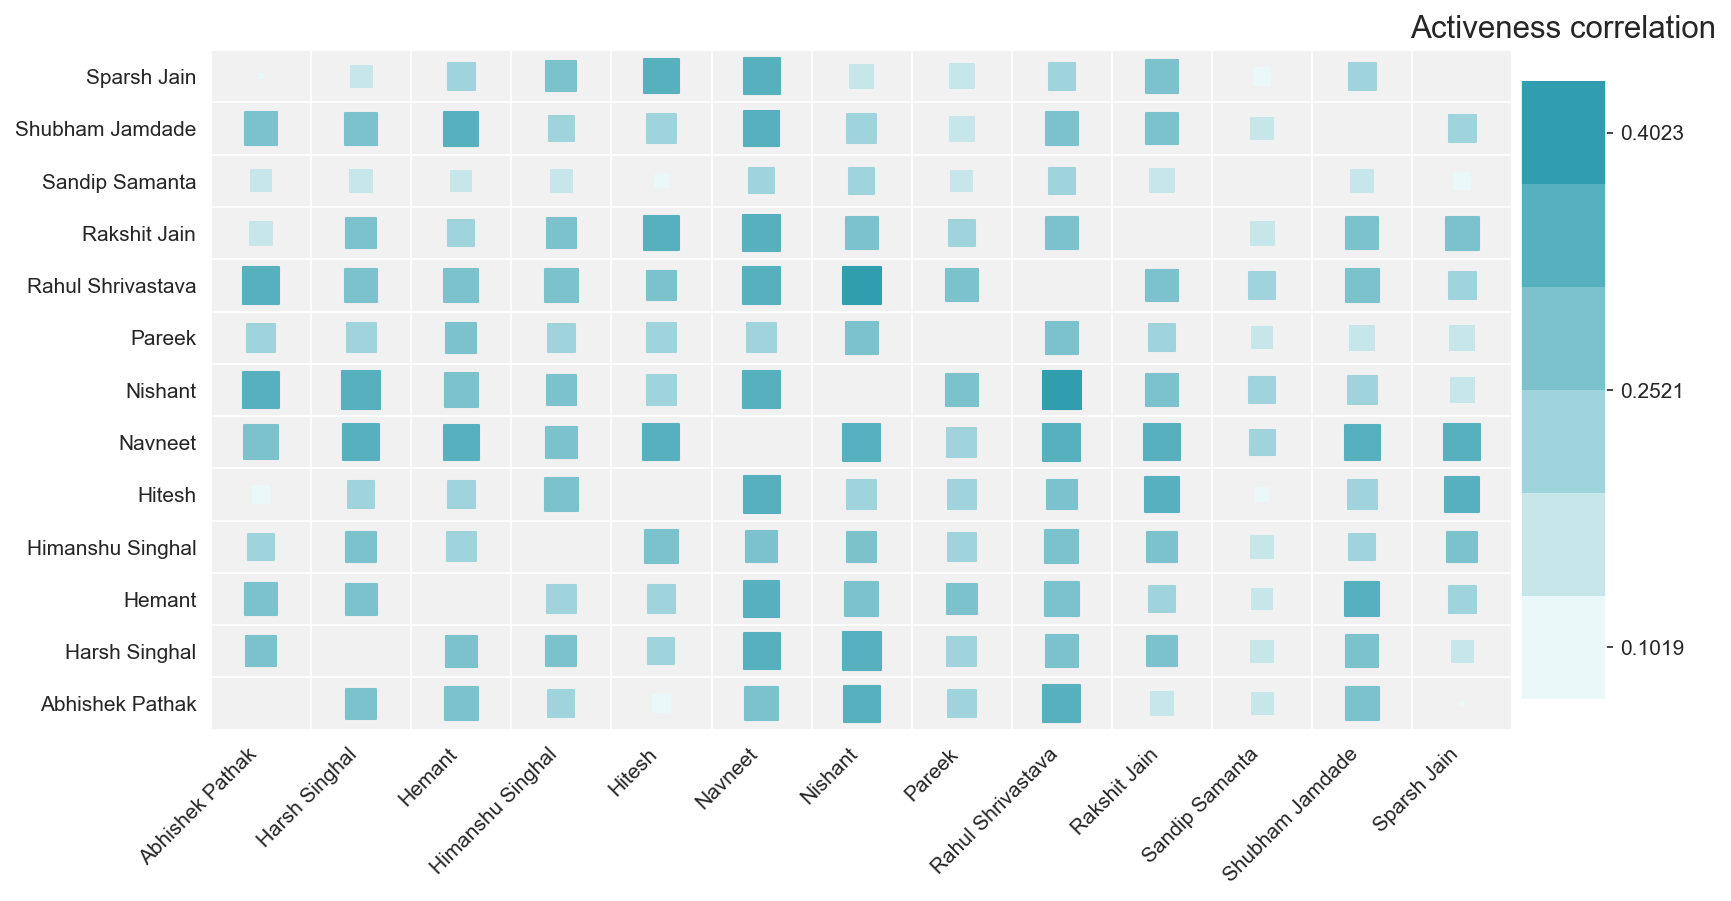

In [46]:
analysis_3_df = activeness_df.corr()
analysis_3_df = analysis_3_df.stack().reset_index()
analysis_3_df.columns=["author_a", "author_b", "value"]
analysis_3_df = analysis_3_df[analysis_3_df["author_a"] != analysis_3_df["author_b"]]

plt.figure(figsize=(12, 6))
heatmap(
    x=analysis_3_df['author_a'],
    y=analysis_3_df['author_b'],
    size_scale=330,
    size=analysis_3_df['value'], 
    color=analysis_3_df['value'], 
    palette=sns.light_palette((210, 90, 60), input="husl")
)
plt.title("Activeness correlation", fontsize=15)

In [47]:
def activeness_timeline(author):
    ax= activeness_df[author].plot(figsize=(8, 1), linewidth=.8)
    ax.set_facecolor("black")
    ax.grid(False)
    plot_chart(title=author, title_size=10, ylabel="Active", ylabel_size=10, yticks_size=10)
    

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(activeness_timeline, {'author': dropdown})
display(ui, out)

Output()

#### Messages Deleted

In [48]:
delete_df = df[df["Message"].str.contains("This message was deleted.") | df["Message"].str.contains("You deleted this message.")]

In [49]:
total_messages_df = df.groupby('Author', as_index=False).agg({"Message": 'count'})
total_messages_df.rename(columns={"Message":"Total Messages"}, inplace=True)

In [50]:
analysis_df = delete_df.groupby("Author", as_index=False)["Message"].count()
analysis_df.rename(columns={"Message":  "Messages Deleted"}, inplace=True)
analysis_df = analysis_df.merge(total_messages_df, on="Author", how='outer')
analysis_df.fillna(0, inplace=True)
analysis_df["Messages Deleted"] = analysis_df["Messages Deleted"].astype(int)
analysis_df["% Deleted"] = round(analysis_df["Messages Deleted"]/analysis_df["Total Messages"], 2)
analysis_df[""] = analysis_df.apply(lambda x: percent_helper(x['Messages Deleted']/x['Total Messages']), axis=1)

display(analysis_df.sort_values(["% Deleted", 'Messages Deleted'], ascending=False).reset_index(drop=True))

Author  Messages Deleted  Total Messages  % Deleted  \
0              Hitesh                90            1852       0.05   
1       Harsh Singhal                32            1953       0.02   
2    Himanshu Singhal                28            1219       0.02   
3         Sparsh Jain                29            2212       0.01   
4             Navneet                23            3681       0.01   
5             Nishant                23            3064       0.01   
6     Abhishek Pathak                20            2085       0.01   
7     Shubham Jamdade                17            1192       0.01   
8              Pareek                 9            1086       0.01   
9              Hemant                 3             841       0.00   
10  Rahul Shrivastava                 3            1711       0.00   
11       Rakshit Jain                 2            1696       0.00   
12     Sandip Samanta                 0             215       0.00   

                            
0     1 out of 25 messages  
1   <1 out of 100 messages  
2     1 out of 50 messages  
3   <1 out of 100 messages  
4   <1 out of 100 messages  
5   <1 out of 100 messages  
6   <1 out of 100 messages  
7   <1 out of 100 messages  
8   <1 out of 100 messages  
9   <1 out of 100 messages  
10  <1 out of 100 messages  
11  <1 out of 100 messages  
12  <1 out of 100 messages

#### Interactions

In [51]:
interaction_df = df.sort_values("Date").reset_index(drop=True)
interaction_df["next_author"] = list(interaction_df["Author"][1:].values) + [None]
## removing the last row
interaction_df = interaction_df.iloc[0:interaction_df.shape[0]-1, :]

In [52]:
analysis_1_df = interaction_df.groupby(["Author", "next_author"], as_index=False)["Message"].count()
## removing
analysis_1_df = analysis_1_df[analysis_1_df["Author"] != analysis_1_df["next_author"]]
# analysis_1_df["Author"] = analysis_1_df["Author"].apply(lambda x: x + " " if (x!=author) else x)
analysis_1_df["Author"] = analysis_1_df["Author"].apply(lambda x: x + " ")
labels = list(analysis_1_df["Author"].unique()) + list(analysis_1_df["next_author"].unique())
analysis_1_df["Author_i"] = analysis_1_df["Author"].apply(lambda x: labels.index(x))
analysis_1_df["next_author_i"] = analysis_1_df["next_author"].apply(lambda x: labels.index(x))

In [53]:
## color map
cm = plt.get_cmap('tab20')(np.linspace(0.0, 1.0, len(df["Author"].unique())))
cm_new = []
for i in range(0, len(cm)):
    cm_new.append("rgba({},{},{},{})".format(str(cm[i][0]), str(cm[i][1]), str(cm[i][2]), str(.9)))

color_dict = {}
for author_, color_ in zip(df["Author"].unique(), cm_new):
    color_dict[author_] = color_
    color_dict[author_+" "] = color_

def color_(x, target):
    author, next_author = x["Author"], x["next_author"]
    if (author[0:-1]!=target):
        return color_dict[author]
    else:
        return color_dict[next_author]

In [54]:
def author_interactions(author):
    author_interactions_df = analysis_1_df[(analysis_1_df["Author"] == author + " ") | (analysis_1_df["next_author"] == author)]
    author_interactions_df.loc[author_interactions_df["Author"]==author+" ", "Author_i"] = author_interactions_df[author_interactions_df["next_author"]==author]["next_author_i"].unique()[0]
    author_interactions_df["color"] = author_interactions_df.apply(lambda x: color_(x, author), axis=1)
    fig = go.Figure(data=[go.Sankey(
        node = dict(
            pad = 15,
            thickness = 20,
            line = dict(color = "black", width = 0.5),
            label = labels,
            color = [color_dict[i] for i in labels],
        ),
        link = dict(
            source = list(author_interactions_df["Author_i"].values),
            target = list(author_interactions_df["next_author_i"].values),
            value = list(author_interactions_df["Message"].values),
#             color = list(author_interactions_df["color"].values),
            color = '#DCDCDC',
        ),
    textfont=dict(size=13)
    )])
    fig.update_layout(title_text="Senders | Author | Responders", font_size=14, title_x=0.5)
    fig.show()

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(author_interactions, {'author': dropdown})
display(ui, out)

Output()

#### Sentiment Analysis

In [55]:
sentiment_df = df.copy()
sentiment_df["processed_message"] = sentiment_df["Message"].apply(lambda x: sentiment_preprocessing(x))
sentiment_df["sentiment"] = sentiment_df["processed_message"].apply(lambda x: sentiment_(x))
sentiment_df["value"] = sentiment_df["sentiment"].apply(lambda x: x.value)
sentiment_df["score"] = sentiment_df["sentiment"].apply(lambda x: x.score)

# enriching
## 1. year
sentiment_df["year"] = sentiment_df["Date"].apply(lambda x: x.year)

## 2. month
sentiment_df["month"] = sentiment_df["Date"].apply(lambda x: x.strftime("%b"))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sentiment_df['month'] = pd.Categorical(sentiment_df['month'], months)

In [ ]:
# ## handling: image omiited, document omitted, video omitted, contact card omiited
# sentiment_df.loc[sentiment_df["Message"].str.contains('omitted'), "value"] = "POSITIVE"
# ## handling: "This message was deleted", "You deleted this message"
# sentiment_df.loc[(sentiment_df["Message"].str.contains("This message was deleted.") | sentiment_df["Message"].str.contains("You deleted this message.")), "value"] = "NEGATIVE"

In [59]:
sentiment_df.head(2)

Date      Time       Author                         Message  \
0 2017-12-16  15:41:26  Sparsh Jain  Next sem trek par chalte hain😍   
1 2017-12-16  15:41:48  Sparsh Jain                              🗻🏕   

                                            processed_message  \
0  Next sem trek par chalte hain smiling face with heart-eyes   
1                                          mount fuji camping   

           sentiment     value     score  year month  
0  POSITIVE (0.9987)  POSITIVE  0.998662  2017   Dec  
1  POSITIVE (0.9945)  POSITIVE  0.994499  2017   Dec

Message             : 😇😇thank u brothers :)
Processed Message   : smiling face with halo smiling face with halo thank u brothers Happy face or smiley


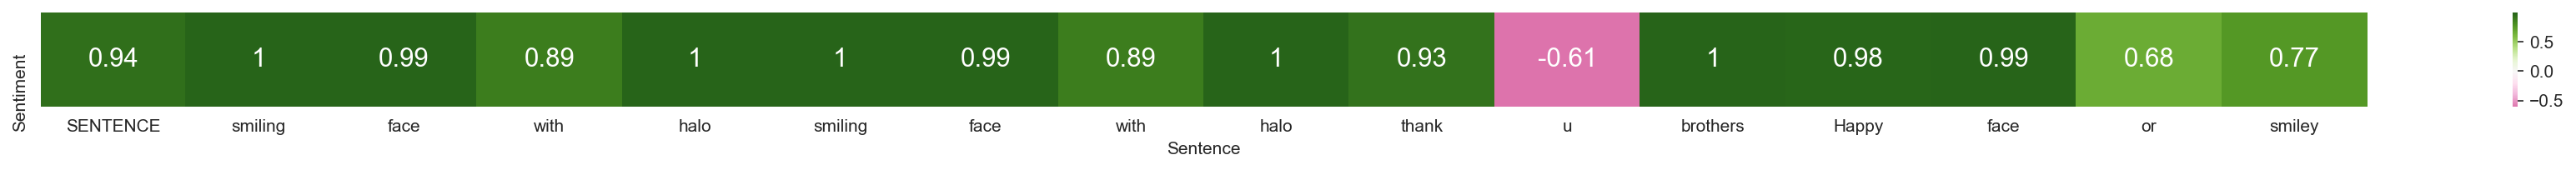

In [57]:
message = sentiment_df.iloc[22043]["Message"]
processed_message = sentiment_df.iloc[22043]["processed_message"]
print ("{:<20}: {}".format("Message", message))
print ("{:<20}: {}".format("Processed Message", processed_message))
visualise_sentiments(processed_message)

##### Basic statistics

In [58]:
positive_counts = sentiment_df[sentiment_df["value"] == "POSITIVE"].shape[0]
negative_counts = sentiment_df[sentiment_df["value"] == "NEGATIVE"].shape[0]

print ("{:<32}: {}".format("Total messages", total_messages))
print ("{:<32}: {} ({}%)".format("Positive sentiment messages", positive_counts, round(100*positive_counts/total_messages, 2)))
print ("{:<32}: {} ({}%)".format("Negative sentiment messages", negative_counts, round(100*negative_counts/total_messages, 2)))

Total messages                  : 22807
Positive sentiment messages     : 13255 (58.12%)
Negative sentiment messages     : 9552 (41.88%)


##### Overall

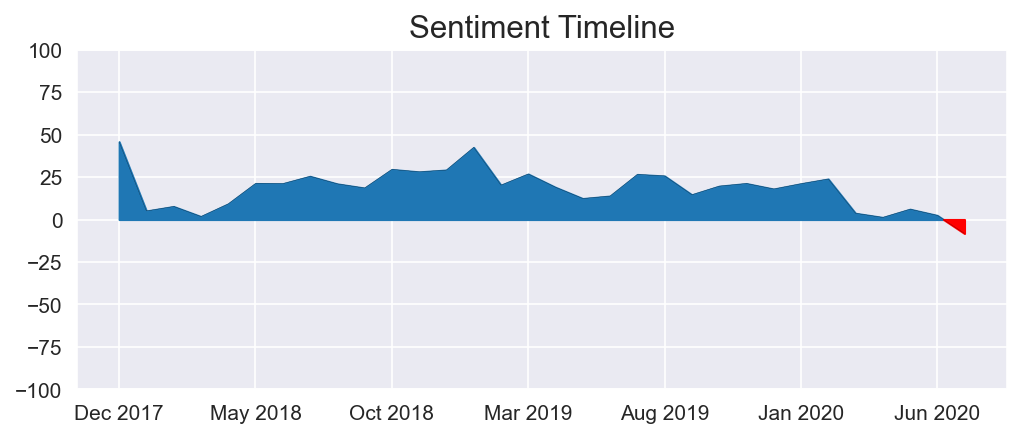

In [62]:
analysis_1_df = sentiment_df.pivot_table(index=["year", "month"], columns="value", values="Message", aggfunc='count', fill_value=0)
analysis_1_df.columns.name = None
analysis_1_df.index = [str(i[1]) + " " + str(i[0]) for i in analysis_1_df.index]
analysis_1_df["total_messages"] = analysis_1_df.sum(axis=1)
analysis_1_df['overall'] = analysis_1_df["POSITIVE"] - analysis_1_df["NEGATIVE"]
analysis_1_df["sentiment"] = round(100*analysis_1_df['overall']/analysis_1_df["total_messages"], 2)

x = analysis_1_df.index
y = analysis_1_df['sentiment'].values
ax = analysis_1_df['sentiment'].plot(color='black', linewidth=0.1)
ax.fill_between(x, 0, y, where=y>=0, color='#1f77b4', interpolate=True)
ax.fill_between(x, 0, y, where=y<0, color='red', interpolate=True)
plt.ylim(-100, 100)
plot_chart(title="Sentiment Timeline", title_size=15)

##### Author-wise

In [115]:
analysis_2_df = sentiment_df.pivot_table(index="Author", columns="value", values="Message", aggfunc="count", fill_value=0)
analysis_2_df.reset_index(inplace=True)
analysis_2_df.columns.name = None
analysis_2_df["Total Messages"] = analysis_2_df.sum(axis=1)
analysis_2_df["NEGATIVE %"] = round(100*analysis_2_df["NEGATIVE"]/analysis_2_df["Total Messages"], 1)
analysis_2_df["POSITIVE %"] = round(100*analysis_2_df["POSITIVE"]/analysis_2_df["Total Messages"], 1)
analysis_2_df = analysis_2_df[["Author", "Total Messages", "POSITIVE", "NEGATIVE", "POSITIVE %", "NEGATIVE %"]]
analysis_2_df["Overall"] = analysis_2_df["POSITIVE %"] - analysis_2_df["NEGATIVE %"]

In [117]:
analysis_2_df.sort_values("Overall", ascending=False).reset_index(drop=True)

Author  Total Messages  POSITIVE  NEGATIVE  POSITIVE %  \
0      Sandip Samanta             215       167        48        77.7   
1   Rahul Shrivastava            1711      1259       452        73.6   
2     Shubham Jamdade            1192       811       381        68.0   
3       Harsh Singhal            1953      1252       701        64.1   
4     Abhishek Pathak            2085      1271       814        61.0   
5              Pareek            1086       632       454        58.2   
6        Rakshit Jain            1696       984       712        58.0   
7    Himanshu Singhal            1219       693       526        56.8   
8         Sparsh Jain            2212      1234       978        55.8   
9             Nishant            3064      1692      1372        55.2   
10             Hitesh            1852       953       899        51.5   
11            Navneet            3681      1890      1791        51.3   
12             Hemant             841       418       423        49.7   

    NEGATIVE %  Overall  
0         22.3     55.4  
1         26.4     47.2  
2         32.0     36.0  
3         35.9     28.2  
4         39.0     22.0  
5         41.8     16.4  
6         42.0     16.0  
7         43.2     13.6  
8         44.2     11.6  
9         44.8     10.4  
10        48.5      3.0  
11        48.7      2.6  
12        50.3     -0.6

In [81]:
def author_sentiment(author):
    analysis_3_df = sentiment_df[sentiment_df["Author"] == author]
    analysis_3_df = analysis_3_df.pivot_table(index=["year", "month"], columns="value", values="Message", aggfunc='count', fill_value=0)
    analysis_3_df.columns.name = None
    analysis_3_df.index = [str(i[1]) + " " + str(i[0]) for i in analysis_3_df.index]
    
    
    analysis_3_df["total_messages"] = analysis_3_df.sum(axis=1)
    analysis_3_df['overall'] = analysis_3_df["POSITIVE"] - analysis_3_df["NEGATIVE"]
    analysis_3_df["sentiment"] = round(100*analysis_3_df['overall']/analysis_3_df["total_messages"], 2)
        
    x = analysis_3_df.index
    y = analysis_3_df['sentiment'].values
    ax = analysis_3_df['sentiment'].plot(color='black', linewidth=0.1)
    ax.fill_between(x, 0, y, where=y>=0, color='#1f77b4', interpolate=True)
    ax.fill_between(x, 0, y, where=y<0, color='red', interpolate=True)
    plt.ylim(-100, 100)    
    plot_chart(title=author + ": Sentiment Timeline", title_size=20)

dropdown = widgets.Dropdown(options=df["Author"].unique(), description='Author')

ui = widgets.HBox([dropdown])
out = widgets.interactive_output(author_sentiment, {'author': dropdown})
display(ui, out)

Output()

## References

- https://towardsdatascience.com/build-your-own-whatsapp-chat-analyzer-9590acca9014
- https://medium.com/towards-artificial-intelligence/whatsapp-group-chat-analysis-using-python-and-plotly-89bade2bc382
- https://github.com/PetengDedet/WhatsApp-Analyzer
- https://levelup.gitconnected.com/text-and-sentiment-analysis-of-whatsapp-messages-1eebc983a58

In [ ]:
#no